In [1]:
# Create a model that can predict  the profit based on its features . Use appropriate evaluation metrics.
# The  Dataset can be downloaded  from kaggle.com   Dataset : Salary_Data

# Simple Linear Regression - Predict Salary


In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [3]:
# Step 1: Load dataset
data = pd.read_csv("salary_data.csv")

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
# Step 2: Define features (X) and target (y)
X = data[["YearsExperience"]]  # Independent variable
y = data["Salary"]             # Dependent variable (Profit)

In [8]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
# Step 4: Train model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Step 5: Predictions
y_pred = model.predict(X_test)

In [11]:
# Step 6: Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [12]:
print("\nModel Performance:")
print(f"R² Score       : {r2:.4f}")
print(f"Mean Absolute Error : {mae:.2f}")
print(f"Mean Squared Error  : {mse:.2f}")
print(f"Root MSE            : {rmse:.2f}")


Model Performance:
R² Score       : 0.9024
Mean Absolute Error : 6286.45
Mean Squared Error  : 49830096.86
Root MSE            : 7059.04


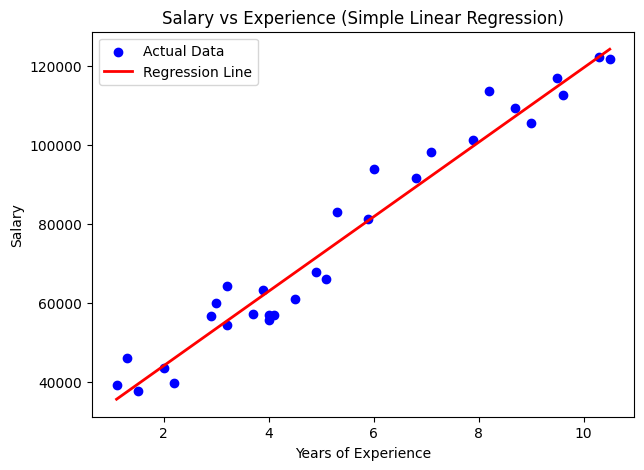

In [13]:
# Step 7: Visualization - Regression Line
plt.figure(figsize=(7,5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience (Simple Linear Regression)")
plt.legend()
plt.show()

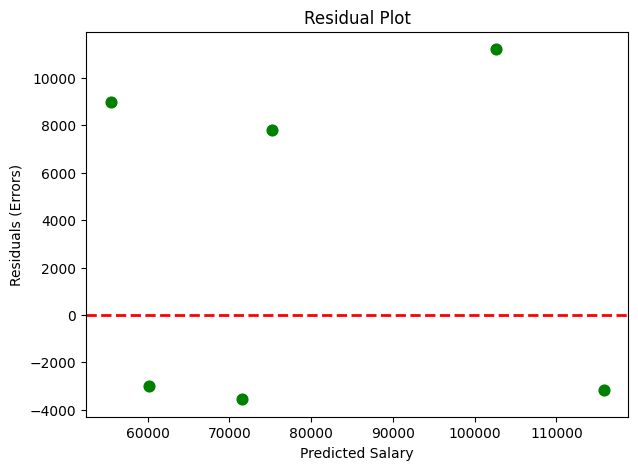

In [14]:
# Step 8: Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, color="green", s=60)
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.show()

In [15]:
# Step 9: Regression Equation
slope = model.coef_[0]       # coefficient (m)
intercept = model.intercept_ # intercept (c)

print(f"\nRegression Equation:")
print(f"Salary = {slope:.2f} * YearsExperience + {intercept:.2f}")


Regression Equation:
Salary = 9423.82 * YearsExperience + 25321.58


In [16]:
# Step 10: Predict Salary for new experience values
new_experience = [[5], [10], [12]]  # example inputs

predicted_salary = model.predict(new_experience)

for exp, sal in zip(new_experience, predicted_salary):
    print(f"Predicted Salary for {exp[0]} years of experience = {sal:.2f}")


Predicted Salary for 5 years of experience = 72440.66
Predicted Salary for 10 years of experience = 119559.74
Predicted Salary for 12 years of experience = 138407.37


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
